In [1]:
#The file is located in my google drive 
from google.colab import drive

#mounting google drive
drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
import os

!cp './drive/My Drive/intel_image.h5' './'


In [4]:
from tensorflow import keras

model = keras.models.load_model('./intel_image.h5')

In [ ]:
tensorflowjs_converter --input_format=keras /tmp/model.h5 /tmp/tfjs_model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image_dataset
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import image_dataset_from_directory as image_dsfd
from PIL import Image
from keras.models import Sequential
from keras.layers.normalization import batch_normalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
#from sklearn.model_selection import train_test_split
import random

In [ ]:
#Unzip file to googlecolab
!mkdir -p '/content/data/Intel'
!unzip '/content/drive/My Drive/Datasets/Intel_image_classification.zip' -d '/content/data/Intel'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7652.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7654.jpg  
  inflating: /content/data/Intel/seg_train/seg_train/mountain/7662.jpg  


In [ ]:
train = image_dataset.image_dataset_from_directory(
    directory ='/content/data/Intel/seg_train/seg_train',
    image_size=(150,150),
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = 'categorical',
    shuffle = False
)

validation = image_dataset.image_dataset_from_directory(
    directory ='/content/data/Intel/seg_train/seg_train',
    image_size=(150,150),
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    label_mode = 'categorical',
    shuffle = False
)

test = image_dataset.image_dataset_from_directory(
    directory ='/content/data/Intel/seg_test/seg_test',
    image_size=(150,150),
    label_mode = 'categorical',
    shuffle = False
)

dummy = image_dataset.image_dataset_from_directory(
    directory ='/content/data/Intel/seg_pred/seg_pred',
    image_size=(150,150),
    labels=None,
    shuffle = False
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.
Found 7301 files belonging to 1 classes.


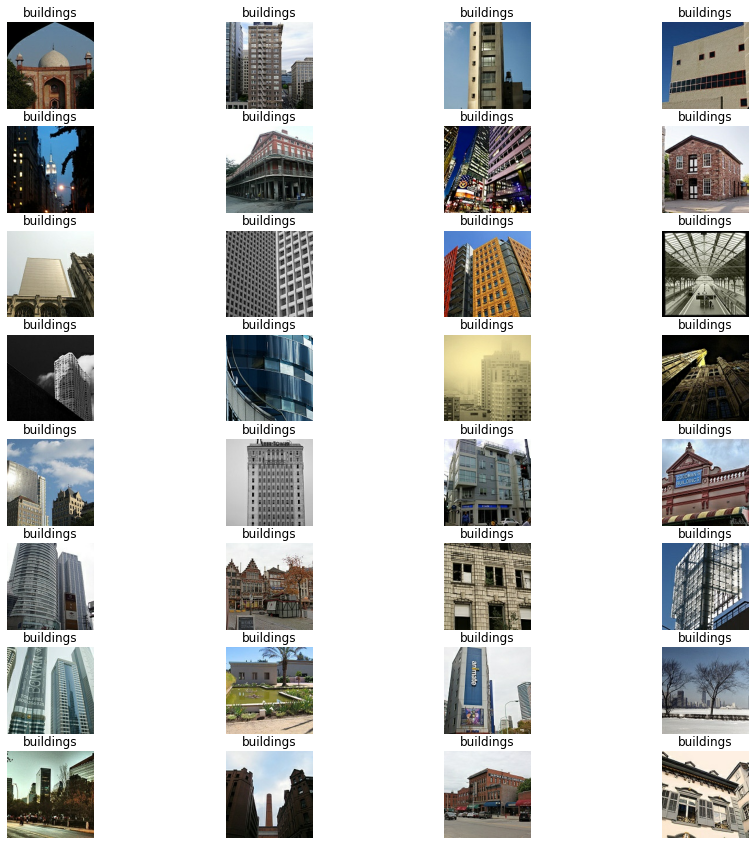

In [ ]:
plt.figure(figsize=(15,15))
class_names = train.class_names

for images, labels in train.skip(1).take(1):
  for i in range(32):
      image = images[i].numpy().astype("uint8")
      label = labels[i].numpy().astype("uint8")
      idx = np.where(label==1)
      plt.subplot(8,4, i+1)
      plt.imshow(image)
      plt.title(class_names[idx[0][0]])
      plt.axis("off")
  


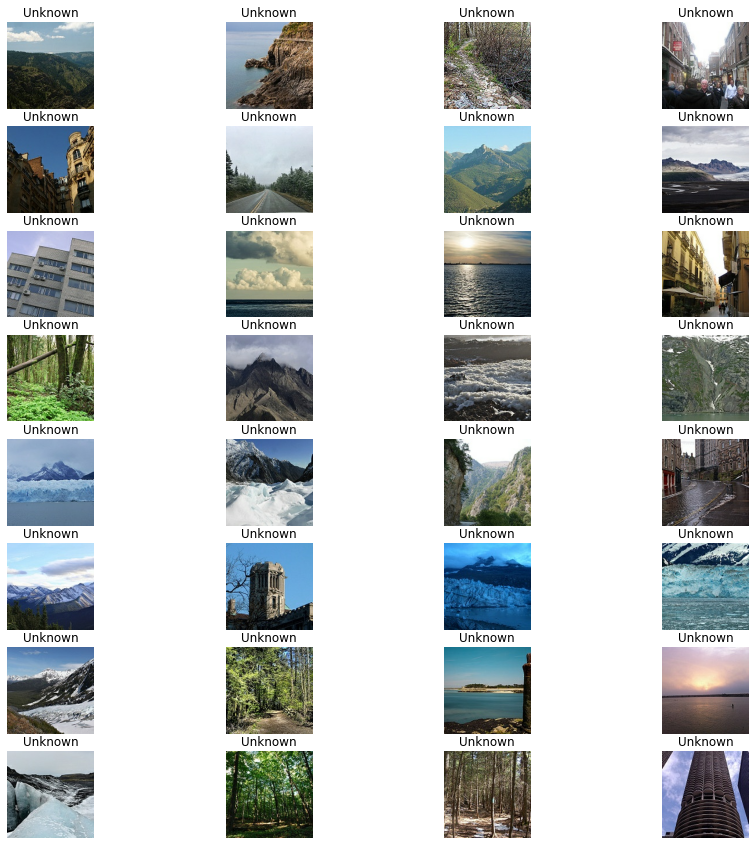

In [ ]:
plt.figure(figsize=(15,15))

for images in dummy.skip(1).take(1):
  for i in range(32):
      image = images[i].numpy().astype("uint8")
      plt.subplot(8,4, i+1)
      plt.imshow(image)
      plt.title('Unknown')
      plt.axis("off")

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


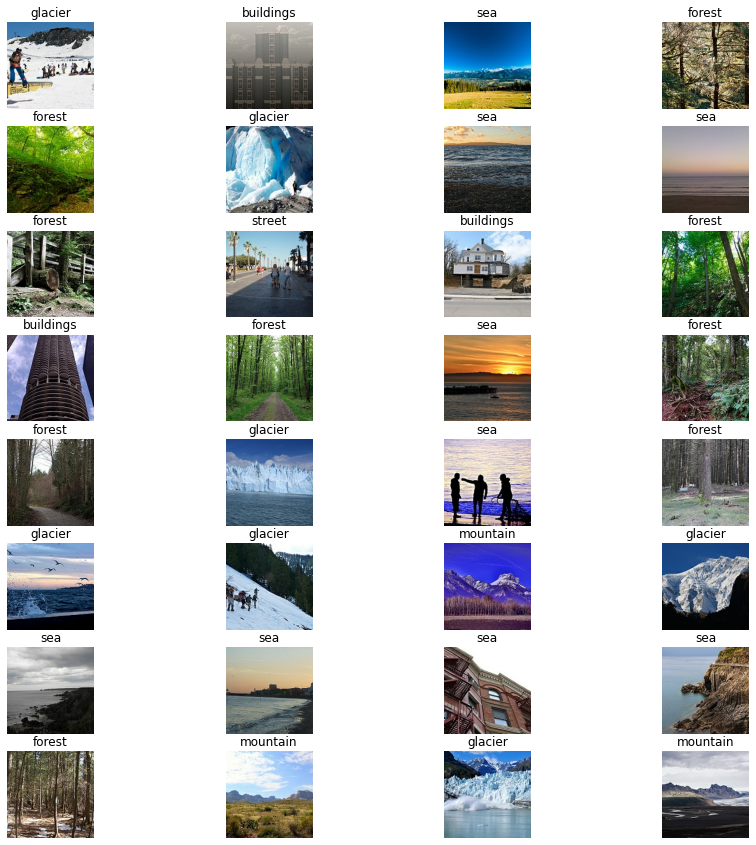

In [ ]:
#using tf.dta.take
plt.figure(figsize=(15,15))
class_names = train.class_names
print(class_names)
for images in dummy.take(1):
  for i in range(32):
      image = images[i].numpy().astype("uint8")
      #needed to add another dimension because of the input dimensions
      y = np.expand_dims(image,axis=0)
      idx = np.argmax(model.predict(y),axis=1)[0]
      plt.subplot(8,4, i+1)
      plt.imshow(image)
      plt.title(class_names[idx])
      plt.axis("off")

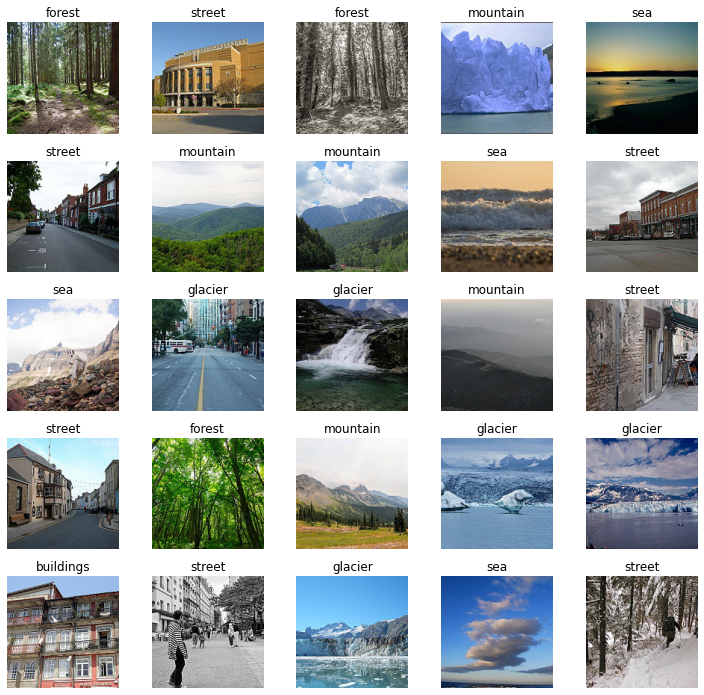

In [ ]:
#using imread
plt.figure(figsize=(10,10))
no_label_path = '/content/data/Intel/seg_pred/seg_pred'

for i in range(1,26):
  plt.subplot(5,5,i)
  plt.tight_layout()
  rand_img = imread(no_label_path + '/' + random.choice(sorted(listdir(no_label_path))))
  y = np.expand_dims(rand_img,axis=0)
  idx = np.argmax(model.predict(y),axis=1)[0]
  plt.title(class_names[idx])
  plt.imshow(rand_img)
  plt.axis('off')



In [ ]:
y_valid_pred = model.predict(validation)

In [ ]:
y_valid = []

for _, label in validation.take(88):
    for i in range(len(label)):
      y_valid.append(label[i].numpy().astype('uint8'))

In [ ]:

y_valid2 = np.array(y_valid)

rows, columns = y_valid2.shape

y_valid_pred_zeros = np.zeros(y_valid2.shape)

yindices = np.argmax(y_valid_pred, axis=1)

for i in range(rows):
  y_valid_pred_zeros[i,yindices[i]] = 1

y_valid_pred_zeros



array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:
_, y_valid_single = np.where(y_valid2==1)
_, y_valid_pred_single = np.where(y_valid_pred_zeros==1)



array([4, 4, 0, ..., 5, 5, 1])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def ConfusionMatrx(tf_model,data, take_no): 
  #get the predicted values
  print('start')
  y_pred = tf_model.predict(data)
  #create empty array to store true outputs
  y = []

  for _, label in data.take(take_no):
      for i in range(len(label)):
        y.append(label[i].numpy().astype('uint8'))
#convert to np array
  y = np.array(y)

  rows, columns = y.shape

  y_pred_zeros = np.zeros(y.shape)
  #get indices for where y_valid is maximum
  yindices = np.argmax(y_pred, axis=1)

  #
  for i in range(rows):
    y_pred_zeros[i,yindices[i]] = 1

  _, y_single = np.where(y==1)
  _, y_pred_single = np.where(y_pred_zeros==1)
  ConfusionMatrixDisplay.from_predictions(y_single, y_pred_single, display_labels = class_names, xticks_rotation='vertical', normalize='true', values_format=".0%")


start


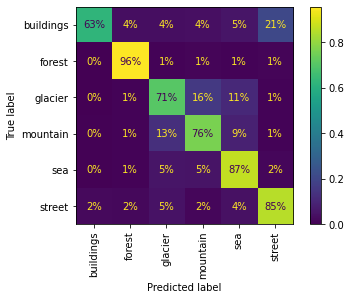

In [ ]:
ConfusionMatrx(model,test,94)